This notebook is a test notebook for classifiying images

In [1]:
%pip install numpy
%pip install matplotlib
%pip install opencv-python
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/jonatan/Library/Python/3.10/lib/python/site-packages/scipy/__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [13]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])



In [25]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0036 - accuracy: 0.9991
Epoch 2/3
1875/1875 [==============================] - 2s 933us/step - loss: 0.0021 - accuracy: 0.9994
Epoch 3/3
1875/1875 [==============================] - 2s 944us/step - loss: 0.0037 - accuracy: 0.9990


In [26]:
loss, accuracy = model.evaluate(x_test, y_test)

print("loss: ", loss)
print("accuracy: ", accuracy)

313/313 [==============================] - 0s 533us/step - loss: 0.2704 - accuracy: 0.9790
loss:  0.27044421434402466
accuracy:  0.9789999723434448


1/1 [==============================] - 0s 12ms/step
The number is probably a 3


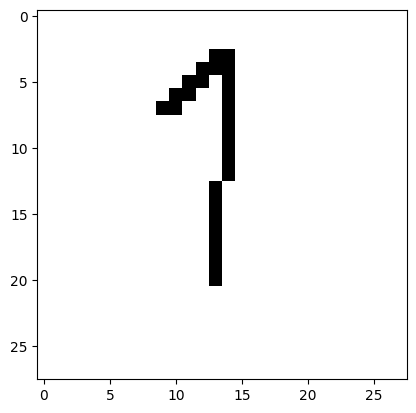

1/1 [==============================] - 0s 11ms/step
The number is probably a 2


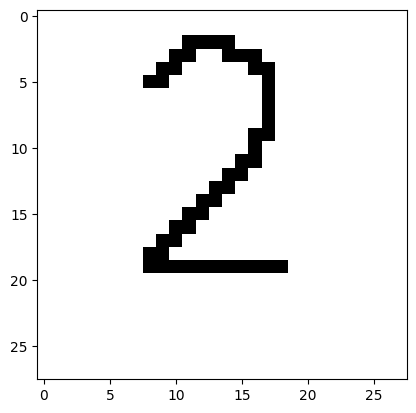

1/1 [==============================] - 0s 12ms/step
The number is probably a 3


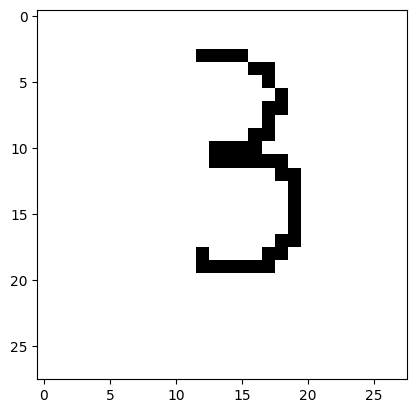

1/1 [==============================] - 0s 11ms/step
The number is probably a 4


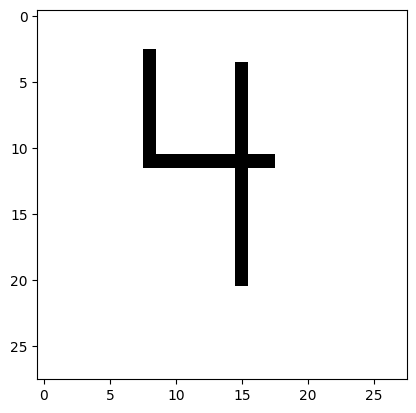

1/1 [==============================] - 0s 11ms/step
The number is probably a 5


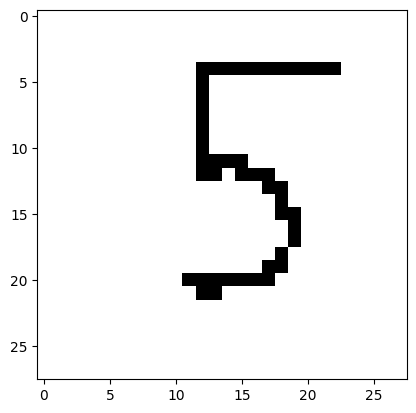

1/1 [==============================] - 0s 11ms/step
The number is probably a 6


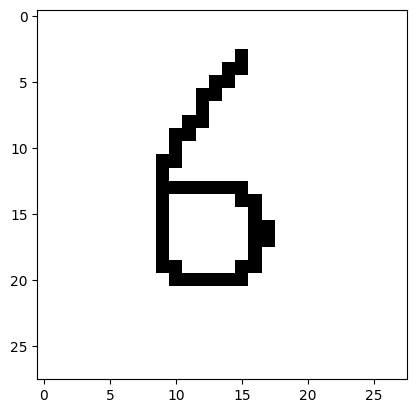

1/1 [==============================] - 0s 11ms/step
The number is probably a 1


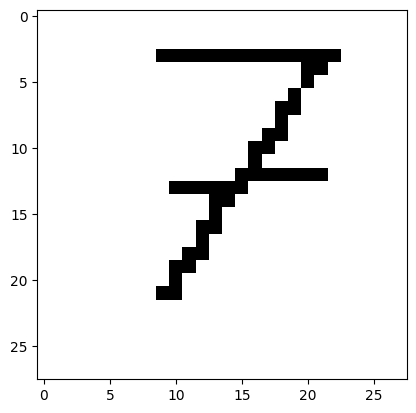

1/1 [==============================] - 0s 14ms/step
The number is probably a 4


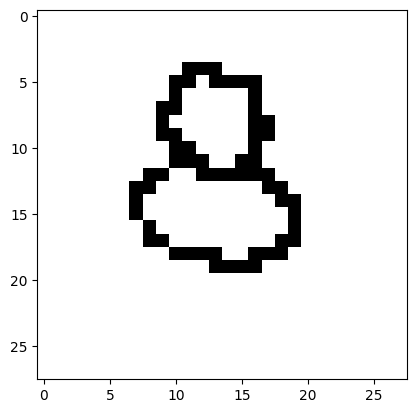

1/1 [==============================] - 0s 11ms/step
The number is probably a 3


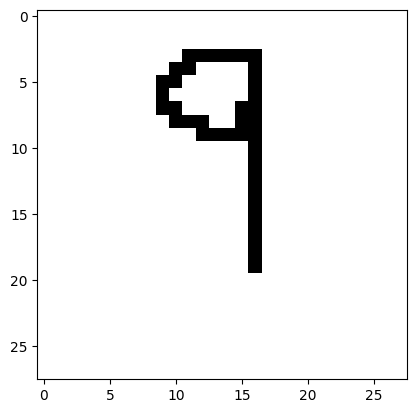

In [27]:
image_number = 1
while os.path.isfile('digits/digit{}.png'.format(image_number)):
    try:
        img = cv2.imread('digits/digit{}.png'.format(image_number))[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print("The number is probably a {}".format(np.argmax(prediction)))
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error reading image! Proceeding to the next one...")
    finally:
        image_number += 1